# Final Project Submission

Please fill out:
* Student name: Kevin Spring
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Cycle
1. Ask
2. Prepare (Exploratory Data Analysis - EDA)
3. Process (Clean)
4. Analyze
5. Share - Who are the stakeholders?
6. Act

# ASK: What Films Can Microsoft's new movie studio create to be successful?

- What is success? (Profit | Top Reputation/Ratings)

## Four recommendations to get from this business question
- **WHAT** movie genre in the past have had the highest profit and reputation/ratings
- **WHEN** is the best time to release these high reputation and profitable movies?
- **WHO** would be the best actors, directors, producers, for these films.
- **HOW** many films should be produced (based on budget: low, median, high budgets)



# Prepare (Exploratory Data Analysis)

- What data is available 
    - The data used in this analysis are four files provided by Flatiron for analysis.
        - IMDB (SQLite Database)
        - Box Office Mojo
            - Gross income: bom.movie_gross.csv
        - Rotten Tomatoes
            - Movie information: rt.movie_info.tsv
            - Review data: rt.reviews.tsv
        - The MovieDB
            - tmdb.movies.csv
        - The Numbers (CSV)
            - Movie Budget: tn.movie_budgets.csv

- Be in a format that is clean and accessible

- What is the movie population, the sample set, any control groups?



In [1]:
# Import CSV and TSV data

import pandas as pd

bom_gross_income_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz', header = 0)
rt_movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t', header = 0)
rt_movie_review_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', header = 0, encoding = 'latin-1')
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz', header = 0)
tn_movie_budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', header = 0)


## Box Office Mojo Data

This data has the title of the movie, gross income from domestic (United States) and foreign sources, the year the movie was released, and a code for studio.

This data would need to be combined with other data sets to answer our business question.

In [ ]:
# Return top of Box Office Mojo Data
bom_gross_income_df.info()

## Rotten Tomatoes Movie Info and Reviews

### Movie info
The data contains 11 columns that contains information about the movie such as when it was released, MPA rating, the genre, the total made at the 'box office', produciton studio, and runtime of the movie.

From this data we can ask:
- How long are the highest box office movies?
- What MPA rating do the highest box office movies have?
- What genre has the highest box office sales?
- Is there a specific time of the year that has the highest box office sales? What genre dominates?

In [ ]:
rt_movie_info_df.info()

### Rotten Tomato Review data
- Contains review data of ranking up to 5 which are generated from viewers
- Contains critic review with rating 'fresh' for a good rating and 'rotten' for a bad rating

In [ ]:
rt_movie_review_df.info()

## The Movie Database
Contains review data on movies and codes for the genre

In [ ]:
tmdb_movies_df.info()

## The Numbers Movie Budget database
- This dataframe contains the production budget and the gross income from domestic and worldwide release.

In [ ]:
## The Numbers Movie Budget database
tn_movie_budget_df.info()

## IMDB data

This data is contained in a SQLite database with 7 tables. From the ERD I will be using the tables movie_basics and movie_ratings which contains the title of the movie, ratings, genre, and runtime.

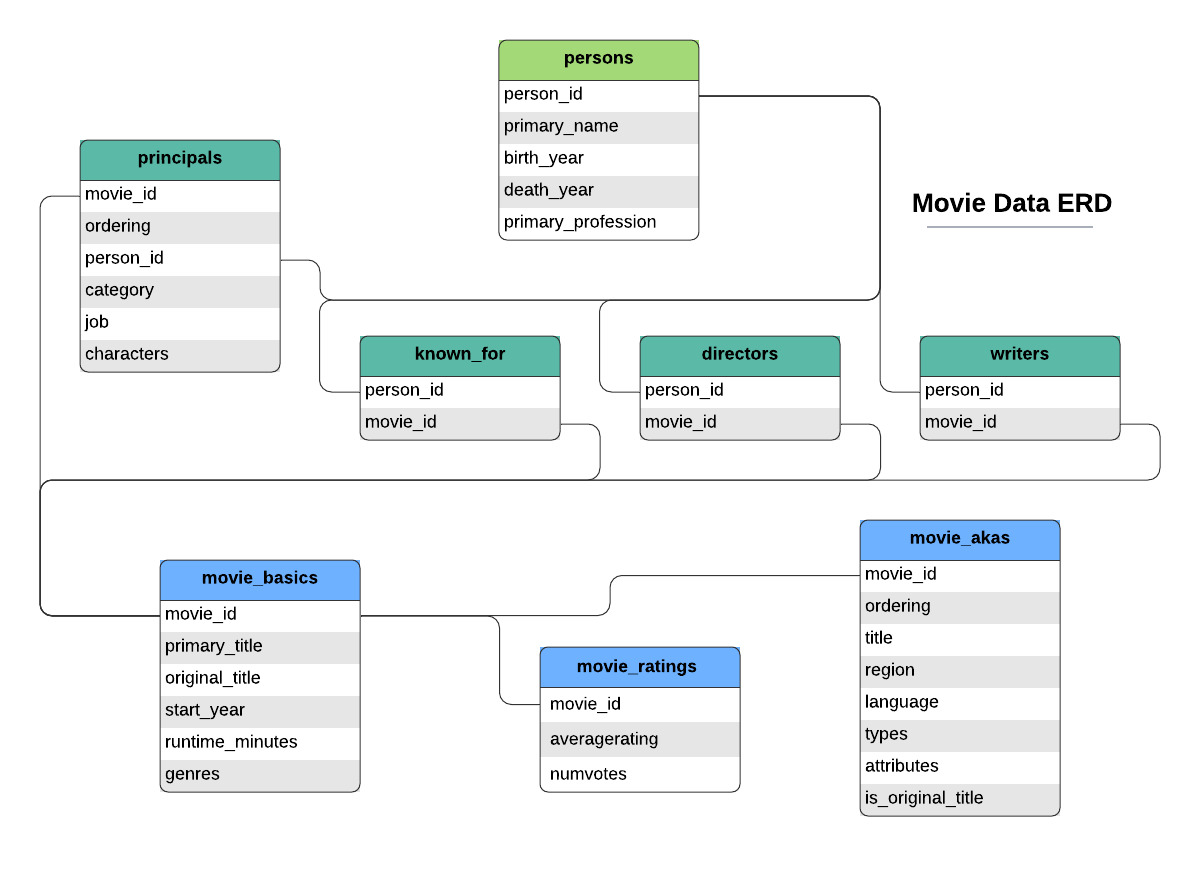

In [2]:
# Make connection to SQLite database
import sqlite3

# will join 2 tables movie_basics and movie_ratings

conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()
q = '''
        SELECT *
        FROM movie_basics
        INNER JOIN movie_ratings
             USING(movie_id);
'''
imdb_df  = pd.read_sql_query(q, conn)
imdb_df.info()

conn.close()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


### EDA Results

Box Office Mojo (BOM) and the Numbers databases (TNDB) have information about the production budget and gross revenue. The Numbers database has the most records of these two databases with 5782 records while BOM has 3359 non-null domestic box office revenue and 2037 foreign non-null box office revenue. Researching the difference between these two databases indicates that BOM is a more reliable dataset then The Numbers as BOM includes subsequent releases. The Numbers dataset also contains the production budget which I will need to analyze profit. I will include both BOM and TNDB to capture as much information as possible with the data provided.

Rotten Tomatoes, IMDB, and the Movie Database has release date, rating, and ranking information with ten times as many records as the Numbers database. Since the Numbers database has fewer entries, most of the movie titles will not be used because there is not enough budget and gross revenue data for them.

I will use IMDB, TNDB, and BOM to get the the maximum possible records to analyze.

In [ ]:
print('IMDB dataframe')
imdb_df.head()

In [ ]:
print('TNDB dataframe')
tn_movie_budget_df.head()

In [ ]:
print('BOM Dataframe')
bom_gross_income_df.head()

# Process

In this step of the process I will clean the data by discovering missing or erronous data.

## Data Cleaning Steps
1. Discover and remove duplicates
2. Find any missing values
    - NaN
    - None
3. Check for placeholders
    A. Arbitrary dates
    B. Look for top occuring values 
        - special characters
        - special numbers
4. Have numerical data in the correct data type
5. Merge data
    - Merge the cleaned IMDB, TNDB, and BOM dataframes together
6. Drop extraneous columns (extraneous or irrelevant data)


### 1. Find and Correct Duplicated Entries

(NEEDS TO BE EDITITED)

Dupilicated entries is another problem with data. There are no duplicated entries in IMDB or DOM based on the movie_id code. There are duplicated movie titles, but released in different years. When merging these two dataframes I will need to take into account the year of title of the movie and the year of its release.

In [3]:
# Look for duplicates
# IMDB
print("IMDB")
print("Duplicated records: ", imdb_df.duplicated('movie_id').sum())

# TNDB
print("\nThe Numbers Data")
print("Duplicated records: ", tn_movie_budget_df.duplicated().sum())

# TNDB
print("\nThe Numbers Data")
print("Duplicated records: ", bom_gross_income_df.duplicated().sum())

IMDB
Duplicated records:  0

The Numbers Data
Duplicated records:  0

The Numbers Data
Duplicated records:  0


### 2. Find and Correct Missing Values

#### IMDB

In IMDB there are 7620 missing values for the runtime infromation and 804 missing genre data. My analysis does not require runtime information but it will require genre data. This will be further explored.

In [4]:
print("IMDB Missing Values")
imdb_df.isnull().sum() # add up all the True (1) values to identify null values

IMDB Missing Values


movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

#### IMBD with missing genre data

In [5]:
imdb_df[imdb_df['genres'].isnull()].head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
18,tt0253093,Gangavataran,Gangavataran,2018,134.0,None,6.6,8
29,tt0306058,Second Coming,Second Coming,2012,95.0,None,5.5,20
33,tt0326592,The Overnight,The Overnight,2010,88.0,None,7.5,24
37,tt0330811,Regret Not Speaking,Regret Not Speaking,2011,NaN,None,6.2,10
38,tt0330987,"Tiden är en dröm, del 2","Tiden är en dröm, del 2",2014,109.0,None,6.3,6


In [6]:
# Create list of movie titles from IMDB with missing genre data
## Reference https://www.geeksforgeeks.org/how-to-check-if-pandas-column-has-value-from-list-of-string/
imdb_title_missing_genre  = imdb_df[imdb_df['genres'].isnull()]['primary_title']

# Check to see if the movie title is in TNDB
print("Movies in IMDB without matching IMDB genre data")
tn_movie_budget_df[tn_movie_budget_df['movie'].isin(imdb_title_missing_genre)]

Movies in IMDB without matching IMDB genre data


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
38,39,"May 14, 2010",Robin Hood,"$210,000,000","$105,487,148","$322,459,006"
408,9,"Nov 21, 2018",Robin Hood,"$99,000,000","$30,824,628","$84,747,441"
887,88,"Dec 25, 2015",Joy,"$60,000,000","$56,451,232","$101,134,059"
1272,73,"Mar 19, 2010",The Bounty Hunter,"$45,000,000","$67,061,228","$135,808,837"
1405,6,"Sep 25, 2015",The Intern,"$40,000,000","$75,764,672","$197,115,710"
1810,11,"Sep 3, 2010",Going the Distance,"$32,000,000","$17,804,299","$43,603,990"
3584,85,"Sep 9, 2016",When the Bough Breaks,"$10,000,000","$29,747,603","$30,768,449"
5620,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"


In [7]:
# Inspect further
imdb_df[(imdb_df['primary_title'] == 'Robin Hood')]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
444,tt0955308,Robin Hood,Robin Hood,2010,140.0,"Action,Adventure,Drama",6.6,239480
23187,tt2363363,Robin Hood,Robin Hood,2013,92.0,"Action,Drama",6.3,78
46637,tt4532826,Robin Hood,Robin Hood,2018,116.0,"Action,Adventure,Thriller",5.3,41588
63953,tt6858500,Robin Hood,Robin Hood,2018,NaN,None,7.6,5


In [8]:
imdb_df[(imdb_df['primary_title'] == 'Joy')]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
3174,tt1465490,Joy,Joy,2010,75.0,Drama,6.1,233
25009,tt2446980,Joy,Joy,2015,124.0,Drama,6.6,118086
25664,tt2495188,Joy,Hara,2012,80.0,None,5.8,28
59840,tt6180144,Joy,Joy,2016,80.0,Drama,7.1,34
72093,tt8917752,Joy,Joy,2018,99.0,Drama,6.5,430


##### Drop IMDB records with missing genre data
There are only 8 records with missing genre data that are in TNDB. Further analysis shows that these movies are not in TNDB but had similar titles. This data will be dropped in the cleaned IMDB dataframe.

In [9]:
# Drop IMDB data with missing genre data

# Make a copy of the IMDB dataframe
imdb_clean_df = imdb_df.copy()
drop_index_imdb_genre  = imdb_clean_df[imdb_clean_df['genres'].isnull()].index
imdb_clean_df.drop(drop_index_imdb_genre, inplace = True)
print('IMDB data with missing genre: ', len(imdb_clean_df[imdb_df['genres'].isnull()]))

IMDB data with missing genre:  0


C:\Users\kevin\AppData\Local\Temp/ipykernel_22124/506227787.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('IMDB data with missing genre: ', len(imdb_clean_df[imdb_df['genres'].isnull()]))


#### TNDB

The Numbers database (TNDB) has no missing values for any of its variables. This is suspect and instead of missing values there may be placeholder values which I will assess later.

In [10]:
print("TNDB Missing Values")
tn_movie_budget_df.isnull().sum()

TNDB Missing Values


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

#### BOM

There are 5 records in the Box Office Mojo (BOM) without studio information, 28 without domestic revenue and 1,350 without foreign revenue information. The missing studio and domestic revenue information can be corrected manually if needed. The missing foreign revenue information will be corrected with TNDB data or ignored.

In [11]:
print("BOM Missing Values")
bom_gross_income_df.isnull().sum()

BOM Missing Values


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

I will use a placeholder of 0 for the missing domestic_gross and foreign_gross data in the BOM dataframe

In [12]:
# Make a copy of the DOM dataframe
bom_clean_df = bom_gross_income_df.copy()
# convert all NaN in foreign_gross and domestic_gross to 0
bom_clean_df['foreign_gross'].fillna(0, inplace = True)
bom_clean_df['domestic_gross'].fillna(0, inplace = True)
bom_clean_df.describe()

,domestic_gross,year
count,3.387000e+03,3387.000000
mean,2.850821e+07,2013.958075
std,6.675575e+07,2.478141
min,0.000000e+00,2010.000000
25%,1.115000e+05,2012.000000
50%,1.300000e+06,2014.000000
75%,2.750000e+07,2016.000000
max,9.367000e+08,2018.000000


### 3. Placeholders

#### A. Top Occuring Values
Some databases have placeholders instead of null or NaN values. I will search for top occuring values to see if placeholders or data artifacts that indicate placeholders.

In [13]:
# Look for top occuring values
print('IMDB\n')
for col in imdb_df.columns:
    print(col, '\n', imdb_clean_df[col].value_counts(normalize = True).head(10), '\n')

print('TNDB\n')
for col in tn_movie_budget_df.columns:
    print(col, '\n', tn_movie_budget_df[col].value_counts(normalize = True).head(10), '\n')
    
print('BOM\n')
for col in bom_gross_income_df.columns:
    print(col, '\n', bom_clean_df[col].value_counts(normalize = True).head(10), '\n')

IMDB

movie_id 
 tt0063540    0.000014
tt4856092    0.000014
tt4857062    0.000014
tt4857058    0.000014
tt4856996    0.000014
tt4856674    0.000014
tt4856508    0.000014
tt4856190    0.000014
tt4855748    0.000014
tt4857264    0.000014
Name: movie_id, dtype: float64 

primary_title 
 The Return    0.000151
Broken        0.000137
Together      0.000123
Lucky         0.000123
Homecoming    0.000123
Delirium      0.000110
Brothers      0.000110
Home          0.000110
Rage          0.000110
The Gift      0.000110
Name: primary_title, dtype: float64 

original_title 
 Broken        0.000123
Lucky         0.000123
The Gift      0.000110
The Return    0.000110
Delirium      0.000110
Homecoming    0.000096
Solo          0.000096
The End       0.000082
Dead End      0.000082
Split         0.000082
Name: original_title, dtype: float64 

start_year 
 2017    0.118245
2016    0.117902
2015    0.115055
2014    0.113193
2013    0.108211
2012    0.104063
2018    0.102338
2011    0.099573
2010    0.0

#### A. Release Dates
The release date in TNDB dataframe looks like there is placeholder values for the month and day as the top eight values are on December 31. The date needs to be converted to datetime format before any analysis can be done.

In [14]:
# Copy TNDB dataframe to clean
tndb_clean_df = tn_movie_budget_df.copy()

# Convert string date to datetime
tndb_clean_df['release_date'] = pd.to_datetime(tndb_clean_df['release_date'], format='%b %d, %Y')
tndb_clean_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [15]:
# Find all movies with December 31 release date
## Reference: https://stackoverflow.com/questions/25873772/how-to-filter-a-dataframe-of-dates-by-a-particular-month-day 
tndb_new_year_eve_release_df = tndb_clean_df[(tndb_clean_df['release_date'].dt.month == 12) & (tndb_clean_df['release_date'].dt.day == 31)]
print("New Year Eve Release date: ", len(tndb_new_year_eve_release_df), " movies.")
tndb_new_year_eve_release_df.head()

New Year Eve Release date:  181  movies.


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,95,2020-12-31,Moonfall,"$150,000,000",$0,$0
480,81,2019-12-31,Army of the Dead,"$90,000,000",$0,$0
576,77,1999-12-31,Fantasia 2000 (Theatrical Release),"$80,000,000","$69,610,858","$69,618,634"
617,18,2012-12-31,AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,"$77,600,000",$0,"$60,680,125"
671,72,2019-12-31,355,"$75,000,000",$0,$0


A quick manual search of these movies that indicate the release date of December 31 were not exactly on this date. For example, ther sources claim [*Fantasia 2000*](https://en.wikipedia.org/wiki/Fantasia_2000) premiered on December 17, 1999 at Carnegie Hall and released on IMAX worldwide from January 1 to April 30, 2000. [*Moonfall*](https://en.wikipedia.org/wiki/Moonfall_(film)) was released on January 31, 2022.

After the TNDB, BOM, and IMDB dataframes are merged I will use both year data from other data to confirm the data is relevant and can be used for analysis. After that I will bin the release dates by quarterly season. 

# ?????????????WHY?????????????

#### B. Put numerical data in the correct data type

##### Cleaning budget, domestic, and foreign gross revenue
As shown in the previous table TNDB domestic_gross and worldwide_gross is stored as a string data type. I will strip the string, remove the '$' and commas and convert to int data type.

In [16]:
# remove $ and , from production_budget, domestic_gross, and worldwide_gross
tndb_clean_df['production_budget'] = tndb_clean_df['production_budget'].str.replace(',', '')
tndb_clean_df['production_budget'] = tndb_clean_df['production_budget'].str.replace('$', '')
tndb_clean_df['domestic_gross'] = tndb_clean_df['domestic_gross'].str.replace(',', '')
tndb_clean_df['domestic_gross'] = tndb_clean_df['domestic_gross'].str.replace('$', '')
tndb_clean_df['worldwide_gross'] = tndb_clean_df['worldwide_gross'].str.replace(',', '')
tndb_clean_df['worldwide_gross'] = tndb_clean_df['worldwide_gross'].str.replace('$', '')

# Convert to int datatype
tndb_clean_df['production_budget'] = tndb_clean_df['production_budget'].astype('int64')
tndb_clean_df['domestic_gross'] = tndb_clean_df['domestic_gross'].astype('int64')
tndb_clean_df['worldwide_gross'] = tndb_clean_df['worldwide_gross'].astype('int64')

tndb_clean_df.head()

C:\Users\kevin\AppData\Local\Temp/ipykernel_22124/858802773.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tndb_clean_df['production_budget'] = tndb_clean_df['production_budget'].str.replace('$', '')
C:\Users\kevin\AppData\Local\Temp/ipykernel_22124/858802773.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tndb_clean_df['domestic_gross'] = tndb_clean_df['domestic_gross'].str.replace('$', '')
C:\Users\kevin\AppData\Local\Temp/ipykernel_22124/858802773.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tndb_clean

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


#### C. Placeholder of 0 in production_budget, domestic_gross, or worldwide_gross
A placeholder of 0 was discovered as I was cleaning the datetime entries in the TNDB data. Instead of null values, a $0 placeholder is set. This is useful because it is the same strategy I am using for the missing revenue data in the BOM dataframe. I will look over the data to see if there is errors in these records.

In [17]:
# How many entries have a production_budget, domestic_gross, or worldwide_gross budget of $0?

tndb_0_production_budget_no = len(tndb_clean_df[tndb_clean_df['production_budget'] == 0])
tndb_0_domestic_revenue_no = len(tndb_clean_df[tndb_clean_df['domestic_gross'] == 0])
tndb_0_foreign_revenue_no = len(tndb_clean_df[tndb_clean_df['worldwide_gross'] == 0])
tndb_0_domestic_and_foreign_revenue_no = len(tndb_clean_df[(tndb_clean_df['domestic_gross'] == 0) & (tndb_clean_df['worldwide_gross'] == 0)])

print("TNDB entries without Production Budget of $0: ", tndb_0_production_budget_no)
print("TNDB entries without Domestic Revenue of $0: ", tndb_0_domestic_revenue_no)
print("TNDB entries without Foreign Revenue of $0: ", tndb_0_foreign_revenue_no)
print("TNDB entries without Domestic and Foreign Revenue of $0:", tndb_0_domestic_and_foreign_revenue_no)

TNDB entries without Production Budget of $0:  0
TNDB entries without Domestic Revenue of $0:  548
TNDB entries without Foreign Revenue of $0:  367
TNDB entries without Domestic and Foreign Revenue of $0: 367


In [ ]:
#### BOM foreign_gross data not in correct data type

One of the values in the merged dataframe shows that the *Avengers: Infinity War* had a foreign revenue of 1,369.5. Information from [Deadline.com](https://deadline.com/2019/04/avengers-infinity-war-profit-box-office-2018-1202591380/#:~:text=The%20ending%20of%20Infinity%20War,Force%20Awakens%20(%242.06B).) indicates that this value should be in the billions. Lets see what other values in the foreign_revenue colum has commas ','

In [18]:
# Fix datatype of foreign_gross
bom_gross_income_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

`foreign_gross` is listed as an object data type which means it must contain strings and integers in that column

In [19]:
# Extract rows that have commas
bom_clean_df[bom_clean_df['foreign_gross'].str.contains(',', na=False)]

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
1874,Furious 7,Uni.,353000000.0,"1,163.0",2015
2760,The Fate of the Furious,Uni.,226000000.0,"1,010.0",2017
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018


In [20]:
# Manually update foreign gross in the billions
bom_clean_df.at[1872, 'foreign_gross'] = 1131600000
bom_clean_df.at[1873, 'foreign_gross'] = 1019400000
bom_clean_df.at[1874, 'foreign_gross'] = 1163000000
bom_clean_df.at[2760, 'foreign_gross'] = 1010000000
bom_clean_df.at[3079, 'foreign_gross'] = 1369500000
#bom_clean_df['foreign_gross'] = bom_clean_df['foreign_gross'].replace('\.0', '', regex=True)
bom_clean_df['foreign_gross'] = bom_clean_df['foreign_gross'].astype('int64')

In [21]:
# Convert BOM domestic_gross to int 64
bom_clean_df['domestic_gross'] = bom_clean_df['domestic_gross'].astype('int64')

In [22]:
#bom_clean_df[]
bom_clean_df.dtypes

title             object
studio            object
domestic_gross     int64
foreign_gross      int64
year               int64
dtype: object

### 4. Merge Data

### Join TNDB and DOM dataframes

In [31]:
# Left Join of TNDB and BOM dataframes
tndb_bom_df = tndb_clean_df.merge(bom_clean_df, how = 'inner', left_on = 'movie', right_on = 'title')
print("Total records in joined TNDB and BOM", len(tndb_bom_df))
tndb_bom_df.head()

Total records in joined TNDB and BOM 1247


,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000,804600000,2011
1,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,BV,459000000,946400000,2015
2,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,BV,678800000,1369500000,2018
3,9,2017-11-17,Justice League,300000000,229024295,655945209,Justice League,WB,229000000,428900000,2017
4,10,2015-11-06,Spectre,300000000,200074175,879620923,Spectre,Sony,200100000,680600000,2015


In [61]:
# Inner join of TNDB/BOM joined dataframe and IMDB
imdb_tndb_bom_df = tndb_bom_df.merge(imdb_clean_df, how='inner', left_on = 'movie', right_on = 'primary_title')
print("Total records in joined IMDB, TNDB, and BOM Dataframes", len(imdb_tndb_bom_df))
imdb_tndb_bom_df.head()

Total records in joined IMDB, TNDB, and BOM Dataframes 1384


,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000,804600000,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
1,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,BV,459000000,946400000,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
2,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,BV,678800000,1369500000,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
3,9,2017-11-17,Justice League,300000000,229024295,655945209,Justice League,WB,229000000,428900000,2017,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",6.5,329135
4,10,2015-11-06,Spectre,300000000,200074175,879620923,Spectre,Sony,200100000,680600000,2015,tt2379713,Spectre,Spectre,2015,148.0,"Action,Adventure,Thriller",6.8,352504


In [62]:
imdb_tndb_bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384 entries, 0 to 1383
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1384 non-null   int64         
 1   release_date       1384 non-null   datetime64[ns]
 2   movie              1384 non-null   object        
 3   production_budget  1384 non-null   int64         
 4   domestic_gross_x   1384 non-null   int64         
 5   worldwide_gross    1384 non-null   int64         
 6   title              1384 non-null   object        
 7   studio             1384 non-null   object        
 8   domestic_gross_y   1384 non-null   int64         
 9   foreign_gross      1384 non-null   int64         
 10  year               1384 non-null   int64         
 11  movie_id           1384 non-null   object        
 12  primary_title      1384 non-null   object        
 13  original_title     1384 non-null   object        
 14  start_ye

### 5. Removing Extraneous and Irrelevant Data


In [63]:
# Summary statistics of TNDB dataframe
imdb_tndb_bom_df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,id,production_budget,domestic_gross_x,worldwide_gross,domestic_gross_y,foreign_gross,year,start_year,runtime_minutes,averagerating,numvotes
count,1384.00,1384.00,1384.00,1384.00,1384.00,1384.00,1384.00,1384.00,1357.00,1384.00,1384.00
mean,51.62,46813132.44,61104356.43,152811950.77,61195243.20,91596169.21,2013.73,2013.63,107.41,6.44,115553.34
std,28.73,55294884.01,84961598.53,234317069.45,84948107.53,158359260.28,2.54,2.53,19.77,1.02,165058.58
min,1.00,50000.00,1242.00,1242.00,800.00,0.00,2010.00,2010.00,3.00,1.60,5.00
25%,27.00,10000000.00,7710234.00,18928549.75,7900000.00,4575000.00,2011.00,2011.00,95.00,5.90,14504.75
50%,52.00,25000000.00,33680992.00,67045844.50,33700000.00,28000000.00,2014.00,2014.00,105.00,6.50,60010.50
75%,77.00,59250000.00,75632936.75,172359047.50,75625000.00,96200000.00,2016.00,2016.00,118.00,7.10,139090.00
max,100.00,410600000.00,700059566.00,2048134200.00,700100000.00,1369500000.00,2018.00,2019.00,192.00,9.20,1841066.00


#### How many rows have 0 domestic_gross from TNDB and DOM?

In [64]:
print(len(imdb_tndb_bom_df[ (imdb_tndb_bom_df['domestic_gross_x'] == 0) & (imdb_tndb_bom_df['domestic_gross_y'] == 0 )]), "Results with no domestic revenue")

# Drop records that have no BOM and TNDB domestic_gross revenue
drop_index = imdb_tndb_bom_df[ (imdb_tndb_bom_df['domestic_gross_x'] == 0) & (imdb_tndb_bom_df['domestic_gross_y'] == 0 )].index
imdb_tndb_bom_df.drop(drop_index, inplace = True)
print("Dropped", len(drop_index), "records from tndb_bom_df")

0 Results with no domestic revenue
Dropped 0 records from tndb_bom_df


#### How many records have 0 TNDB domestic_gross_x and data for BOM's domestic_gross_y?

In [65]:
print(len(imdb_tndb_bom_df[ (imdb_tndb_bom_df['domestic_gross_x'] == 0) & (imdb_tndb_bom_df['domestic_gross_y'] > 0 )]), "Results with no domestic revenue")
imdb_tndb_bom_df[ (imdb_tndb_bom_df['domestic_gross_x'] == 0) & (imdb_tndb_bom_df['domestic_gross_y'] > 0 )]
# Drop records that have no BOM and TNDB domestic_gross revenue
drop_index = imdb_tndb_bom_df[ (imdb_tndb_bom_df['domestic_gross_x'] == 0) & (imdb_tndb_bom_df['domestic_gross_y'] > 0 )].index
imdb_tndb_bom_df.drop(drop_index, inplace = True)
print("Dropped", len(drop_index), "records from tndb_bom_df")

0 Results with no domestic revenue
Dropped 0 records from tndb_bom_df


In [66]:
# Calculate estimated profit
imdb_tndb_bom_df['profit_estimate'] = imdb_tndb_bom_df['worldwide_gross'] - imdb_tndb_bom_df['production_budget']
imdb_tndb_bom_df.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,profit_estimate
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000,804600000,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624,635063875
1,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,BV,459000000,946400000,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,1072413963
2,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,BV,678800000,1369500000,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,1748134200
3,9,2017-11-17,Justice League,300000000,229024295,655945209,Justice League,WB,229000000,428900000,2017,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",6.5,329135,355945209
4,10,2015-11-06,Spectre,300000000,200074175,879620923,Spectre,Sony,200100000,680600000,2015,tt2379713,Spectre,Spectre,2015,148.0,"Action,Adventure,Thriller",6.8,352504,579620923


In [68]:
# Make Genres into a list

# Function to take a column and split the string by commas
def split_genres(column):
    return column.split(',')

imdb_tndb_bom_df['genres'] = imdb_tndb_bom_df['genres'].apply(split_genres)
imdb_tndb_bom_df.head(3)


,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,profit_estimate
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000,804600000,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"[Action, Adventure, Fantasy]",6.6,447624,635063875
1,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,BV,459000000,946400000,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"[Action, Adventure, Sci-Fi]",7.3,665594,1072413963
2,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,BV,678800000,1369500000,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"[Action, Adventure, Sci-Fi]",8.5,670926,1748134200


# Data Visualization

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plt.rcParams['figure.figsize'] = (10, 10)
#plt.style.use('ggplot')

Text(0.5, 32.0, 'Worldwide Gross Income\n x$ billion')

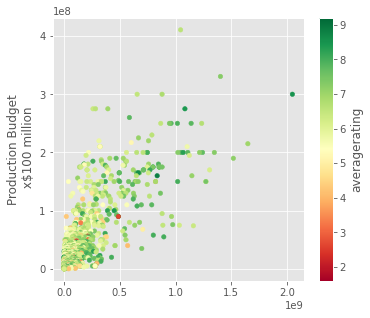

In [285]:
# scatterplot of Budget versus Revenue with grouped by ranking
ax_scatter = imdb_tndb_bom_df.plot.scatter(x='worldwide_gross', y='production_budget', c='averagerating', colormap = 'RdYlGn')
plt.ticklabel_format(useOffset = False, style = 'plain')

plt.ylabel('Production Budget\n x$100 million')
plt.tight_layout()
ax_scatter.ticklabel_format(axis = 'both', style = 'sci', scilimits = (0, 0))
ax_scatter.tick_params(labelbottom = True) # x-axis labels were not showing up but hides the xlabel????
plt.xlabel('Worldwide Gross Income\n x$ billion')

### Discussion
Figure 1 indicates that great movies with a rating of 7 or higher do not need 

Text(0.5, 1.0, 'Worldwide Revenue')

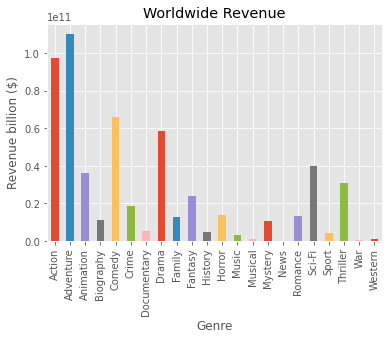

In [257]:
# Boxplot showing Worldwide profit grouped by genre
## Reference: https://stackoverflow.com/questions/72272575/plotting-a-stacked-column-containing-a-categorical-list-using-pandas#72272671

# concatenate genres to imdb_tndb_bom_df
# analysis_df = pd.concat([imdb_tndb_bom_df['worldwide_gross'], df_lists], axis = 1)
# filter needed data from imdb_tndb_bom_df
boxplot_worldwide_df = imdb_tndb_bom_df.filter(['worldwide_gross', 'genres'])

# Make bar chart
#scatter_df.explode('genres').set_index('genres').plot.bar()
df1 = boxplot_worldwide_df.explode('genres').melt('genres').pivot_table(index='genres', columns='genres', values='value', aggfunc='sum')
df1.plot.bar(stacked=True)
plt.legend('', frameon = False)
plt.ylabel('Revenue billion ($)')
plt.xlabel('Genre')
plt.title('Worldwide Revenue')

In [266]:
boxplot_stacked_df = imdb_tndb_bom_df.filter(['domestic_gross_y', 'foreign_gross', 'genres'])
#df = boxplot_stacked_df.explode('genres')
boxplot_stacked_df.explode('genres').groupby(['genres']).head(10)


,domestic_gross_y,foreign_gross,genres
0,241100000,804600000,Action
0,241100000,804600000,Adventure
0,241100000,804600000,Fantasy
1,459000000,946400000,Action
1,459000000,946400000,Adventure
...,...,...,...
1023,38300000,23800000,Musical
1124,3800000,0,Musical
1234,201000,423000,Western
1294,37200,0,News


Text(0.5, 1.0, 'Domestic and Foreign Revenue')

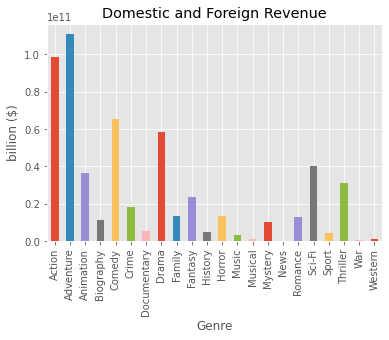

In [175]:
# Stacked Boxplot showing domestic and foregin revenue grouped by genre
# filter needed data from imdb_tndb_bom_df
#boxplot_stacked_df = imdb_tndb_bom_df.filter(['domestic_gross_y', 'foreign_gross', 'genres'])

# Make stacked bar chart
#scatter_df.explode('genres').set_index('genres').plot.bar()
df1 = boxplot_stacked_df.explode('genres').melt('genres').pivot_table(index='genres', columns='genres', values='value', aggfunc='sum')
df1.plot.bar(stacked=True)
plt.legend('', frameon = False)
plt.ylabel('billion ($)')
plt.xlabel('Genre')
plt.title('Domestic and Foreign Revenue')

#### Discussion
Action, adventure, comedy, drama, sci-fi, thriller, and animation have the highest total worldwide revenue. A movie with one or more of these genres would be more likely to generate enough revenue to sustain this project.

#### Discussion

(0.0, 100000000000.0)

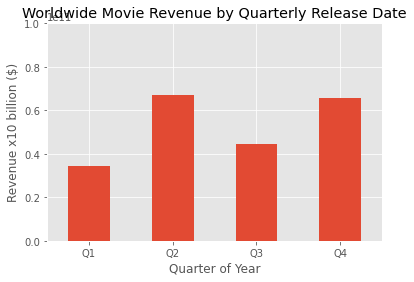

In [252]:
# Box plot showing box office sales with quarter of release

# Extract necessary data
# Genre, date converted to quarter, domestic_gross, foreign_gross, worldwide
boxplot_quarter = imdb_tndb_bom_df.filter(['release_date', 'worldwide_gross'])
#[imdb_tndb_bom_df['release_date'].dt.quarter]
boxplot_quarter['release_date'] = boxplot_quarter['release_date'].dt.quarter # replace date with quarter
quarter_dict = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'} # remap dictionary
boxplot_quarter.replace({'release_date': quarter_dict}, inplace = True) # remap the quarterly values according to dictionary

# Produce the bar plt
#boxplot_quarter.groupby(['release_date']).sum().unstack(0).plot.bar(title = 'Revenue by Quarterly Release Date')
df = boxplot_quarter.groupby('release_date')['worldwide_gross'].sum()
df.plot.bar(title = 'Worldwide Movie Revenue by Quarterly Release Date')
plt.xlabel('Quarter of Year')
plt.xticks(rotation = 0)
plt.ylabel('Revenue x10 billion ($)')
plt.ylim(ymin = 0, ymax = 100000000000)


<AxesSubplot:xlabel='col3'>

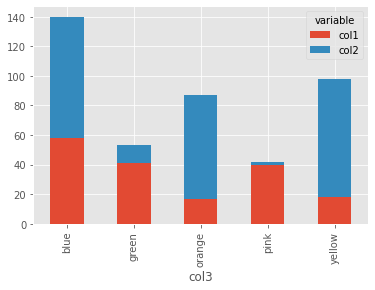

In [155]:
d = {'col1': [1, 17, 40], 'col2': [10, 70, 2], 'col3': [['yellow', 'green', 'blue'], ['yellow', 'orange', 'blue'], ['blue', 'green', 'pink']]}
df = pd.DataFrame(data=d)
#df.explode('col3').set_index('col3').plot.bar(stacked=True)
df1 = df.explode('col3').melt('col3').pivot_table(index='col3', columns='variable', values='value', aggfunc='sum')
df1.plot.bar(stacked=True)